# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

Here is a data set of sales figures from 26 different stores.

In [2]:
data = pd.read_csv('sales.csv')
data

,net_sales,sq_ft,inventory,advertising,district_size,competing_stores
0,231.0,3.0,294,8.2,8.200000,11
1,156.0,2.2,232,6.9,4.100000,12
2,10.0,0.5,149,3.0,4.300000,15
3,519.0,5.5,600,12.0,16.100000,1
4,437.0,4.4,567,10.6,14.100000,5
5,487.0,4.8,571,11.8,12.700000,4
6,299.0,3.1,512,8.1,10.100000,10
7,195.0,2.5,347,7.7,8.400000,12
8,20.0,1.2,212,3.3,2.100000,15
9,68.0,0.6,102,4.9,4.700000,8


## Two features

Let's try to predict net sales from two variables: the square footage (size) of the store, and the number of competing stores in the area. Our model will be:

$$
\text{net sales} \approx w_0 + w_1 \times \text{sqft} + w_2 \times \text{competitors}
$$

Do you expect $w_1$ to be positive or negative? What about $w_2$?

Let's plot the data.

<IPython.core.display.Javascript object>


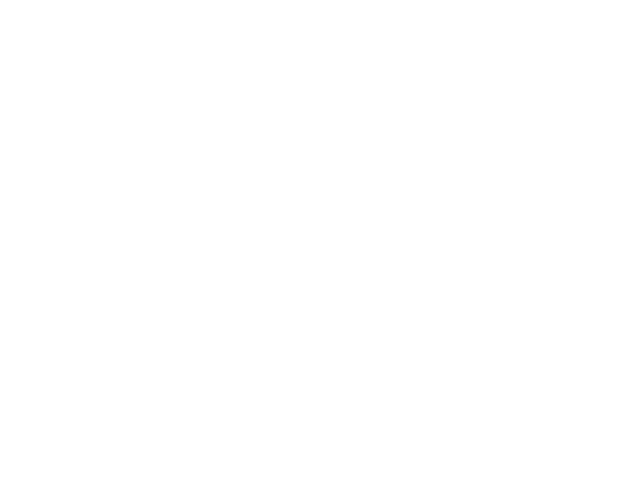

In [3]:
data.plot(kind='scatter', x='sq_ft', y='net_sales')

<IPython.core.display.Javascript object>


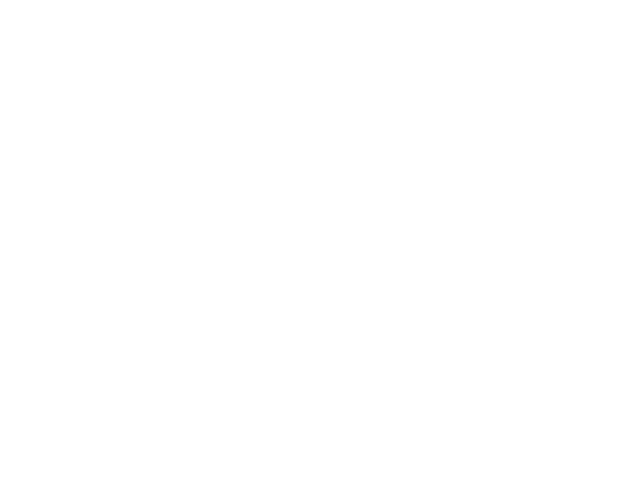

In [4]:
data.plot(kind='scatter', x='competing_stores', y='net_sales')

**Note**: the plot below is interactive. Try clicking and dragging to move the camera.

<IPython.core.display.Javascript object>


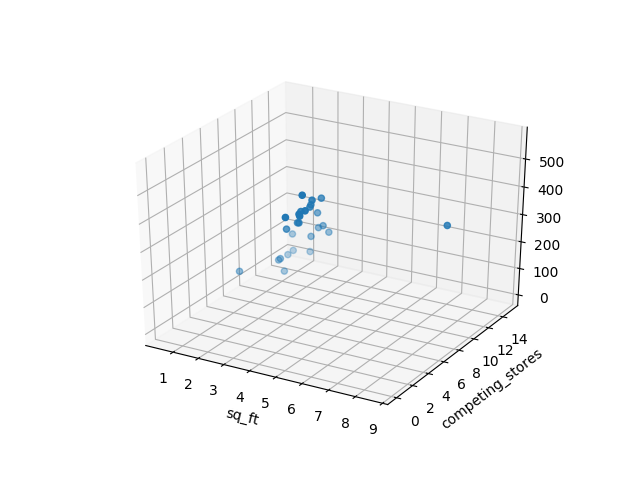

Text(0.5, 0, 'competing_stores')

In [5]:
sq_ft = np.asarray(data['sq_ft'])
competing = np.asarray(data['competing_stores'])
net_sales = np.asarray(data['net_sales'])

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sq_ft, competing, net_sales)
plt.xlabel('sq_ft')
plt.ylabel('competing_stores')

Our design matrix is:
    
$$
\begin{pmatrix}
 1 & s_1 & c_1\\
 1 & s_2 & c_2\\
 \vdots & \vdots & \vdots\\
 1 & s_n & c_n
\end{pmatrix}
$$

where $s_i$ is the size of the $i$th store, and $c_n$ is the number of competitors. In code:

In [6]:
X = np.column_stack((
    np.ones_like(sq_ft),
    sq_ft,
    competing
))
X

array([[ 1.        ,  3.        , 11.        ],
       [ 1.        ,  2.20000005, 12.        ],
       [ 1.        ,  0.5       , 15.        ],
       [ 1.        ,  5.5       ,  1.        ],
       [ 1.        ,  4.4000001 ,  5.        ],
       [ 1.        ,  4.80000019,  4.        ],
       [ 1.        ,  3.0999999 , 10.        ],
       [ 1.        ,  2.5       , 12.        ],
       [ 1.        ,  1.20000005, 15.        ],
       [ 1.        ,  0.60000002,  8.        ],
       [ 1.        ,  5.4000001 ,  1.        ],
       [ 1.        ,  4.19999981,  7.        ],
       [ 1.        ,  4.69999981,  3.        ],
       [ 1.        ,  0.60000002, 14.        ],
       [ 1.        ,  1.20000005, 11.        ],
       [ 1.        ,  1.60000002, 10.        ],
       [ 1.        ,  4.30000019,  4.        ],
       [ 1.        ,  2.5999999 , 13.        ],
       [ 1.        ,  3.79999995,  7.        ],
       [ 1.        ,  5.30000019,  1.        ],
       [ 1.        ,  5.5999999 ,  0.   

Solving the system $X^\intercal X \vec w = X^\intercal \vec y$:

In [7]:
w = np.linalg.solve(X.T @ X, X.T @ net_sales)
w

array([303.49073761,  45.15092186, -21.5851804 ])

The function $H$ that we have fit is not a line; it is a plane:

$$
H(\text{sqft, competitors}) = 303.50 + 45.15 \times \text{sqft} -21.58 \times \text{competitors}
$$


<IPython.core.display.Javascript object>


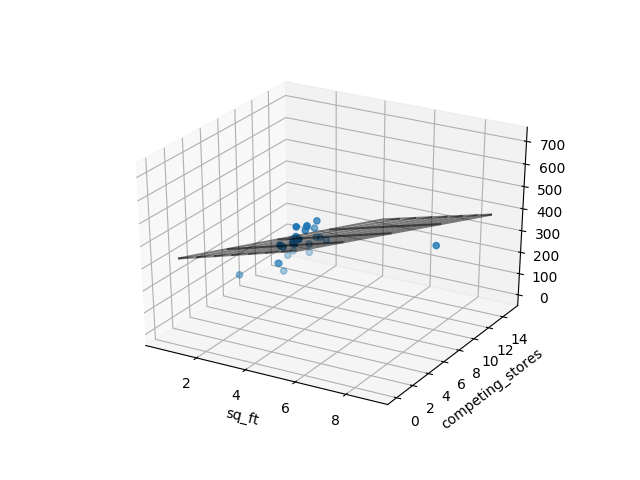

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sq_ft, competing, net_sales)
plt.xlabel('sq_ft')
plt.ylabel('competing_stores')

XX, YY = np.mgrid[1:10:2, 0:16:2]
Z = w[0] + w[1]*XX + w[2]*YY
ax.plot_wireframe(XX, YY, Z, color='black', alpha=.5)

## All features

Let's fit a prediction rule using all of the features.

In [9]:
X = np.column_stack([
    np.ones(data.shape[0]),
    data.iloc[:, 1:].values
])

In [10]:
w = np.linalg.solve(X.T @ X, X.T @ net_sales)
w

array([-18.85941416,  16.20157356,   0.17463515,  11.52626903,
        13.5803129 ,  -5.31097141])

In [11]:
feature_names = list(data.columns[1:])
for name, weight in zip(feature_names, w[1:]):
    print(f'{name}:\t{weight:0.2f}')


sq_ft:	16.20
inventory:	0.17
advertising:	11.53
district_size:	13.58
competing_stores:	-5.31


## Which feature is most "important"?

We should standardize in order to account for the difference in units and scale between the features.

Recall the formula for standard units:

$$x_{(su)} = \dfrac{x - \bar x}{\text{SD}(x)}$$

In [12]:
features = data.iloc[:, 1:].values
standardized_features = (features - features.mean(axis=0))/features.std(axis=0)

In [13]:
X = np.column_stack([
    np.ones(data.shape[0]),
    standardized_features
])

In [14]:
w = np.linalg.solve(X.T @ X, X.T @ net_sales)
w

array([286.57407407,  31.97302867,  32.76054166,  42.69274551,
        68.49841225, -25.51529781])

In [15]:
for name, weight in zip(feature_names, w[1:]):
    print(f'{name}:\t{weight:0.2f}')

sq_ft:	31.97
inventory:	32.76
advertising:	42.69
district_size:	68.50
competing_stores:	-25.52


Which feature appears to have the largest effect on the net sales?

## Nonlinear features

Let's try fitting a rule of the form

$$ H(\text{size}, \text{competitors}) = w_0+w_1 \text{size} + w_2 \text{size}^2 +w_3 \text{competitors} + w_4 \text{competitors}^2 $$


In [16]:
X = np.column_stack((
    np.ones_like(sq_ft),
    sq_ft,
    np.power(sq_ft, 2),
    competing,
    np.power(competing, 2),
))
X

array([[  1.        ,   3.        ,   9.        ,  11.        ,
        121.        ],
       [  1.        ,   2.20000005,   4.84000021,  12.        ,
        144.        ],
       [  1.        ,   0.5       ,   0.25      ,  15.        ,
        225.        ],
       [  1.        ,   5.5       ,  30.25      ,   1.        ,
          1.        ],
       [  1.        ,   4.4000001 ,  19.36000084,   5.        ,
         25.        ],
       [  1.        ,   4.80000019,  23.04000183,   4.        ,
         16.        ],
       [  1.        ,   3.0999999 ,   9.60999941,  10.        ,
        100.        ],
       [  1.        ,   2.5       ,   6.25      ,  12.        ,
        144.        ],
       [  1.        ,   1.20000005,   1.44000012,  15.        ,
        225.        ],
       [  1.        ,   0.60000002,   0.36000003,   8.        ,
         64.        ],
       [  1.        ,   5.4000001 ,  29.16000103,   1.        ,
          1.        ],
       [  1.        ,   4.19999981,  17.639

In [17]:
w = np.linalg.solve(X.T @ X, X.T @ net_sales)
w

array([113.37163643, 128.1016723 ,  -9.08946255, -19.05223525,
         0.36829967])

The function $H$ that we have fit is not a line; it is a plane:

$$
H(\text{size, competitors}) = 113.37 + 128.10 \times \text{size} -9.089 \times \text{size}^2- 19.05223525 \times \text{competitors} +0.36829967 \times \text{competitors}^2
$$


Let's fit a polynomial regression rule to the size of the store

In [18]:
X = np.column_stack((
    np.ones_like(sq_ft),
    sq_ft,
    np.power(sq_ft, 2),
))
X

array([[ 1.        ,  3.        ,  9.        ],
       [ 1.        ,  2.20000005,  4.84000021],
       [ 1.        ,  0.5       ,  0.25      ],
       [ 1.        ,  5.5       , 30.25      ],
       [ 1.        ,  4.4000001 , 19.36000084],
       [ 1.        ,  4.80000019, 23.04000183],
       [ 1.        ,  3.0999999 ,  9.60999941],
       [ 1.        ,  2.5       ,  6.25      ],
       [ 1.        ,  1.20000005,  1.44000012],
       [ 1.        ,  0.60000002,  0.36000003],
       [ 1.        ,  5.4000001 , 29.16000103],
       [ 1.        ,  4.19999981, 17.6399984 ],
       [ 1.        ,  4.69999981, 22.0899982 ],
       [ 1.        ,  0.60000002,  0.36000003],
       [ 1.        ,  1.20000005,  1.44000012],
       [ 1.        ,  1.60000002,  2.56000008],
       [ 1.        ,  4.30000019, 18.49000164],
       [ 1.        ,  2.5999999 ,  6.75999951],
       [ 1.        ,  3.79999995, 14.43999964],
       [ 1.        ,  5.30000019, 28.09000202],
       [ 1.        ,  5.5999999 , 31.359

In [19]:
w = np.linalg.solve(X.T @ X, X.T @ net_sales)
w

array([-126.58299976,  183.59330413,  -13.20251036])

We can treat size$^2$ as a new feature and plot in 2D as if we were fitting a plane.

<IPython.core.display.Javascript object>


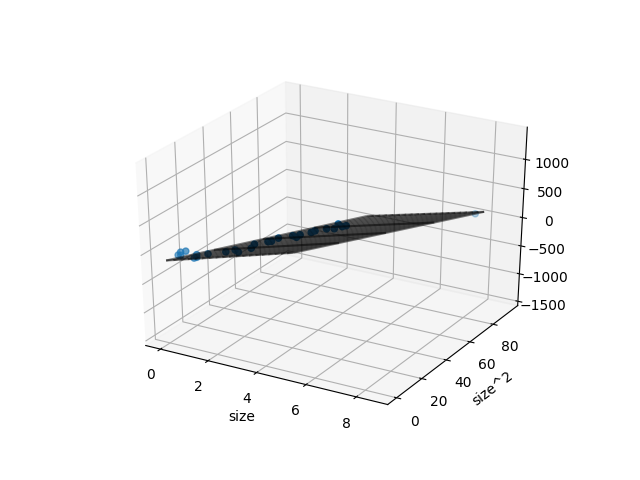

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sq_ft, np.power(sq_ft, 2), net_sales)
plt.xlabel('size')
plt.ylabel('size^2')

XX, YY = np.mgrid[0:10:2, 0:100:5]
Z = w[0] + w[1]*XX + w[2]*YY
ax.plot_wireframe(XX, YY, Z, color='black', alpha=.5)

or more reasonably treat this is a polynomial regression rule and plot as function of size 

<IPython.core.display.Javascript object>


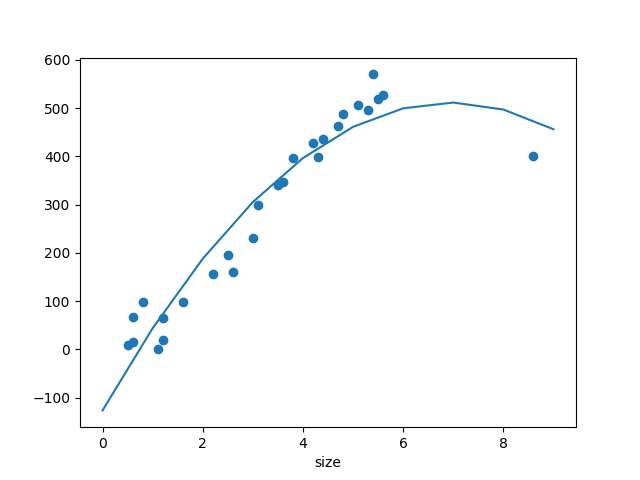

In [21]:
fig = plt.figure()
plt.scatter(sq_ft, net_sales)
plt.xlabel('size')

x = np.arange(10)
h = w[0] + w[1]*x + w[2]*x**2
plt.plot(x,h)

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


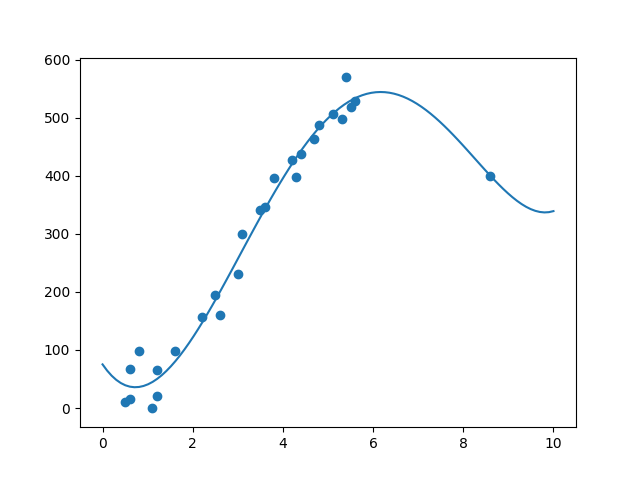

In [22]:
w = np.polyfit(sq_ft, net_sales, deg=5)
xx = np.linspace(0, 10, 100)
predictions = np.column_stack(xx**p for p in range(6)) @ w[::-1]

fig = plt.figure()
plt.plot(xx, predictions)
plt.scatter(sq_ft, net_sales )

Let's try a higher-degree polynomial, with more "turns". But the system of equations obtained when trying to fit a high-degree polynomial is often "ill conditioned", meaning that the small numerical errors resulting from the finite precision of computer math may lead to big inaccuracies in the final result.

In general, any $n$ points in two dimensions can be fit *exactly* by a polynomial of degree $n+1$. For instance, any two points is fit exactly by some line, any three points can be fit by some quadratic, any four points can be fit by some cubic, and so on. So in principle, there is a polynomial of degree $27$ which fits the above data exactly. But look what happens when we try to fit a polynomial with least squares regression:

In [23]:
w = np.polyfit(sq_ft, net_sales, deg=27)
w

/Applications/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([-9.32923855e-13,  4.59722806e-13,  1.04039972e-10,  8.31668342e-10,
       -1.56739032e-09, -9.02102358e-08, -7.54326569e-07,  7.59267639e-07,
        7.39557747e-05,  5.66682792e-04, -2.15043605e-03, -6.48561274e-02,
       -1.69308432e-01,  5.09559548e+00,  2.65611372e+01, -4.55553583e+02,
       -1.16921711e+03,  4.83455272e+04, -3.94621413e+05,  1.82504136e+06,
       -5.57580261e+06,  1.18363505e+07, -1.77035539e+07,  1.85125068e+07,
       -1.31614755e+07,  6.01584402e+06, -1.58141098e+06,  1.80356466e+05])

You'll get an answer, but you probably got an ugly red message saying "Polyfit may be poorly conditioned". 


Moreover, the plot of the predictions is not so good. This means that while, in theory, we should be able to find a degree 21 polynomial to fit this data, in practice, it can be hard to compute a high-degree polynomial to fit our data.

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


<IPython.core.display.Javascript object>


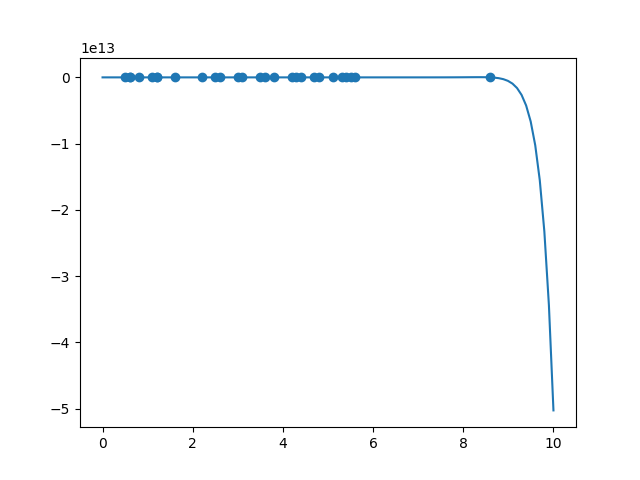

In [24]:
xx = np.linspace(0, 10, 100)
predictions = np.column_stack(xx**p for p in range(28)) @ w[::-1]

fig = plt.figure()
plt.plot(xx, predictions)
plt.scatter(sq_ft, net_sales )